# GDSCv2 Interpretation

This notebook shows some example on how to interpret the output from the Bayesian model to infer responses of basket/cluster combinations.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append('..')
sys.path.append('.')

In [3]:
from pyBasket.common import load_obj
from pyBasket.interpret import get_predicted_basket_df, get_basket_cluster_prob_df, find_top_k_indices, find_bottom_k_indices
from pyBasket.interpret import select_partition, plot_responsive_count, get_member_expression, ttest_dataframe
from pyBasket.interpret import plot_expression_boxplot, df_diff, plot_basket_probs, plot_basket_cluster_heatmap
from pyBasket.clustering import plot_PCA

# Load results

Load previously saved results

In [4]:
drug_name = 'Erlotinib'
C = 10

In [5]:
input_dir = 'results'
file_name = 'patient_analysis_%s_cluster_%d.p' % (drug_name, C)
save_data = load_obj(os.path.join(input_dir, file_name))

In [6]:
list(save_data.keys())

['expr_df_filtered',
 'expr_df_selected',
 'drug_response',
 'class_labels',
 'cluster_labels',
 'patient_df',
 'stacked_posterior',
 'trace',
 'importance_df']

# Things to show in the viz

## Basket probabilities

In [7]:
predicted_basket_df = get_predicted_basket_df(save_data)
predicted_basket_df

,prob
Biliary Tract,0.713715
Bladder/Urinary Tract,0.754761
Bone,0.704600
Bowel,0.699575
Breast,0.599120
Cervix,0.240425
CNS/Brain,0.821203
Esophagus/Stomach,0.733079
Head and Neck,0.103227
Kidney,0.383285


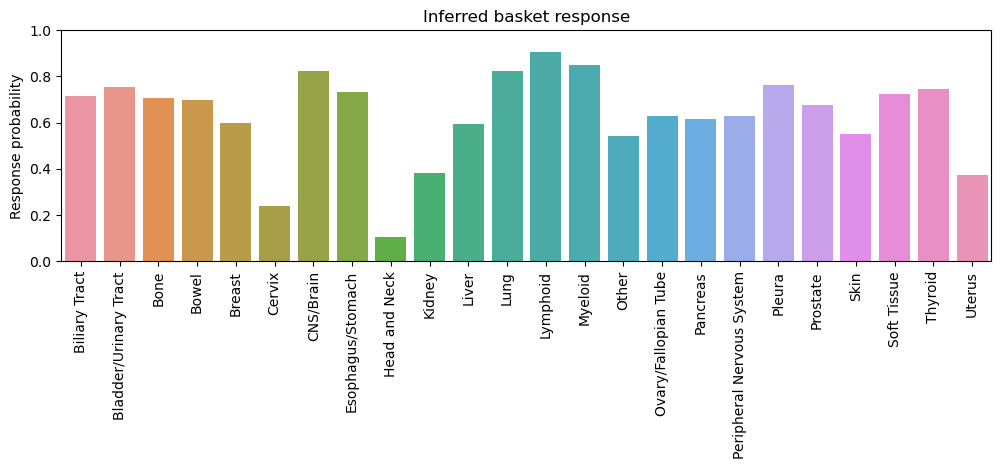

In [8]:
plot_basket_probs(predicted_basket_df)

## Overall heatmap

In [9]:
inferred_df = get_basket_cluster_prob_df(save_data)

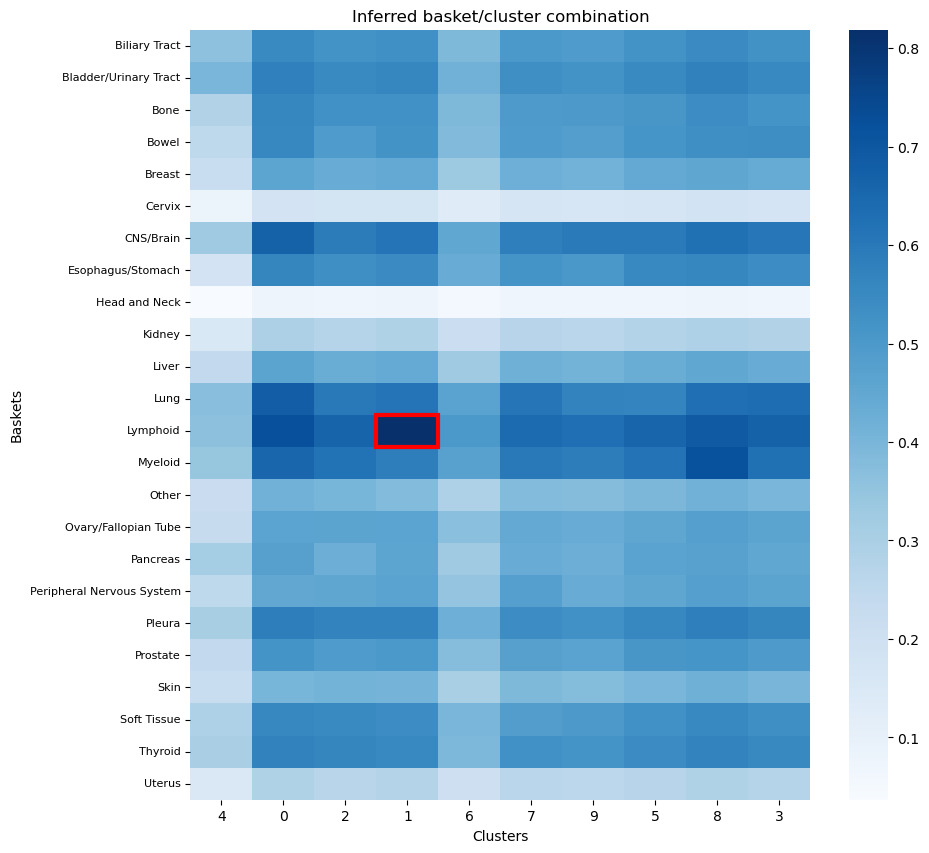

In [10]:
plot_basket_cluster_heatmap(inferred_df, 3, 12)

# Any interesting data to look at?

## Which basket/cluster combinations have the highest / lowest response rates?

In [11]:
top_df = find_top_k_indices(save_data, 10)
top_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,12,3,Lymphoid,1,0.818621,1
1,12,1,Lymphoid,0,0.723756,0
2,13,8,Myeloid,8,0.720113,9
3,12,8,Lymphoid,8,0.692722,26
4,11,1,Lung,0,0.681614,2
5,6,1,CNS/Brain,0,0.668693,0
6,12,9,Lymphoid,3,0.666981,26
7,12,2,Lymphoid,2,0.660900,0
8,12,7,Lymphoid,5,0.658913,0
9,13,1,Myeloid,0,0.654886,0


In [12]:
bottom_df = find_bottom_k_indices(save_data, 10)
bottom_df

,basket_idx,cluster_idx,basket,cluster,probability,count
0,8,1,Head and Neck,0,0.036797,12
1,8,4,Head and Neck,6,0.057199,0
2,8,6,Head and Neck,9,0.071340,0
3,8,5,Head and Neck,7,0.072779,0
4,8,2,Head and Neck,2,0.074585,3
5,8,7,Head and Neck,5,0.074931,0
6,8,9,Head and Neck,3,0.075860,0
7,8,3,Head and Neck,1,0.076728,1
8,8,8,Head and Neck,8,0.078828,0
9,8,0,Head and Neck,4,0.079167,0


## Inspect one partition

In [13]:
query_basket = 'Lymphoid'
query_cluster = 8
selected_df = select_partition(save_data, query_basket, query_cluster)
selected_df

,tissues,responses,basket_number,cluster_number,responsive
samples,,,,,
GR-ST,Lymphoid,0.050943,12,8,1
VAL,Lymphoid,0.003482,12,8,1
BE-13,Lymphoid,0.147782,12,8,0
P30/OHK,Lymphoid,0.153038,12,8,0
U-698-M,Lymphoid,0.000000,12,8,1
MN-60,Lymphoid,0.009550,12,8,1
Karpas-45,Lymphoid,0.075559,12,8,0
BALL-1,Lymphoid,0.032240,12,8,1
Ramos.2G6.4C10,Lymphoid,0.037024,12,8,1


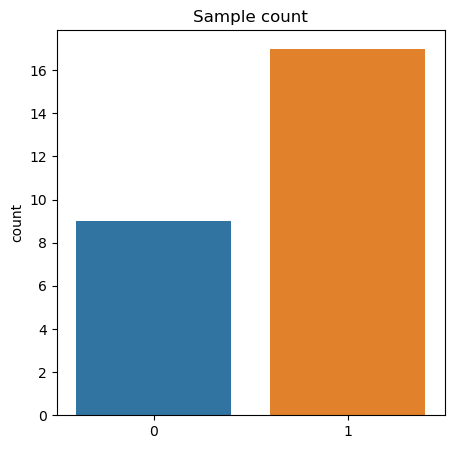

In [14]:
plot_responsive_count(selected_df)

In [15]:
member_df = get_member_expression(selected_df, save_data)
member_df.shape

(26, 500)

PCA explained variance [0.1789462 0.2813458]


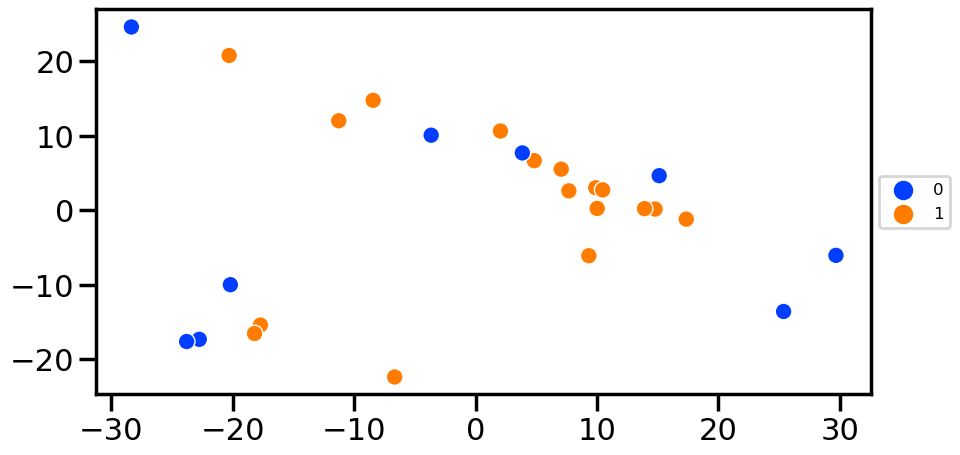

In [16]:
pc1, pc2 = plot_PCA(member_df, hue=selected_df['responsive'], n_components=2)

Pick the first transcript as it has the highest importance score during feature selection.

In [17]:
all_expr_df = df_diff(member_df, save_data['expr_df_selected'])
all_expr_df.shape

(272, 500)

In [18]:
test_df = ttest_dataframe(member_df, all_expr_df, only_significant=True)
test_df

,T-Statistic,P-Value,P-Value (Bonferroni),Significant
Feature,,,,
ENSG00000153714.6,-15.376034,1.275387e-39,6.376935e-37,True
ENSG00000071564.16,12.048586,1.795102e-27,8.975508e-25,True
ENSG00000198624.13,12.008580,2.485498e-27,1.242749e-24,True
ENSG00000074590.13,-11.832869,1.033377e-26,5.166885e-24,True
ENSG00000196754.12,-11.431535,2.604163e-25,1.302081e-22,True
...,...,...,...,...
ENSG00000065328.16,4.017084,7.477337e-05,3.738669e-02,True
ENSG00000153936.17,3.997731,8.081317e-05,4.040658e-02,True
ENSG00000165799.5,-3.980253,8.666360e-05,4.333180e-02,True


In [19]:
selected_feature = test_df.index.values[0]
selected_feature

'ENSG00000153714.6'

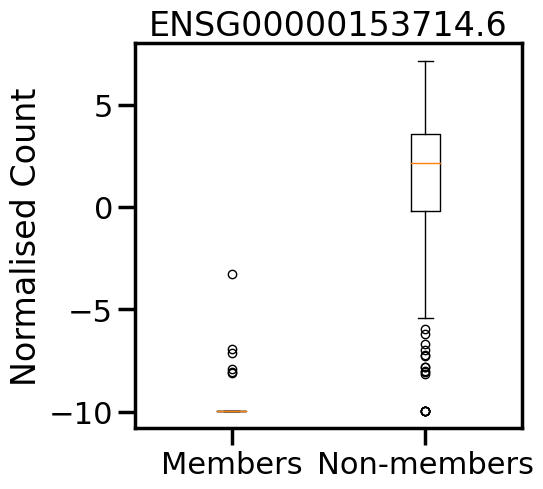

In [20]:
plot_expression_boxplot(selected_feature, member_df, all_expr_df)